In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.float_format","{:.5f}".format)

In [6]:
df=pd.read_csv("Crop_recommendation.csv")
#https://www.kaggle.com/datasets/madhuraatmarambhagat/crop-recommendation-dataset

In [7]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.87974,82.00274,6.50299,202.93554,rice
1,85,58,41,21.77046,80.31964,7.03810,226.65554,rice
2,60,55,44,23.00446,82.32076,7.84021,263.96425,rice
3,74,35,40,26.49110,80.15836,6.98040,242.86403,rice
4,78,42,42,20.13017,81.60487,7.62847,262.71734,rice


In [8]:
df.columns,df.shape

(Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object'),
 (2200, 8))

In [10]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


N – Nitrogen content in the soil (in mg/kg)
P – Phosphorus content in the soil (in mg/kg)
K – Potassium content in the soil (in mg/kg)
temperature – Average temperature in °C
humidity – Average relative humidity in %
ph – Soil pH value
rainfall – Rainfall in mm
label – The crop most suited to the given conditions (e.g., rice, maize, cotton, etc.)


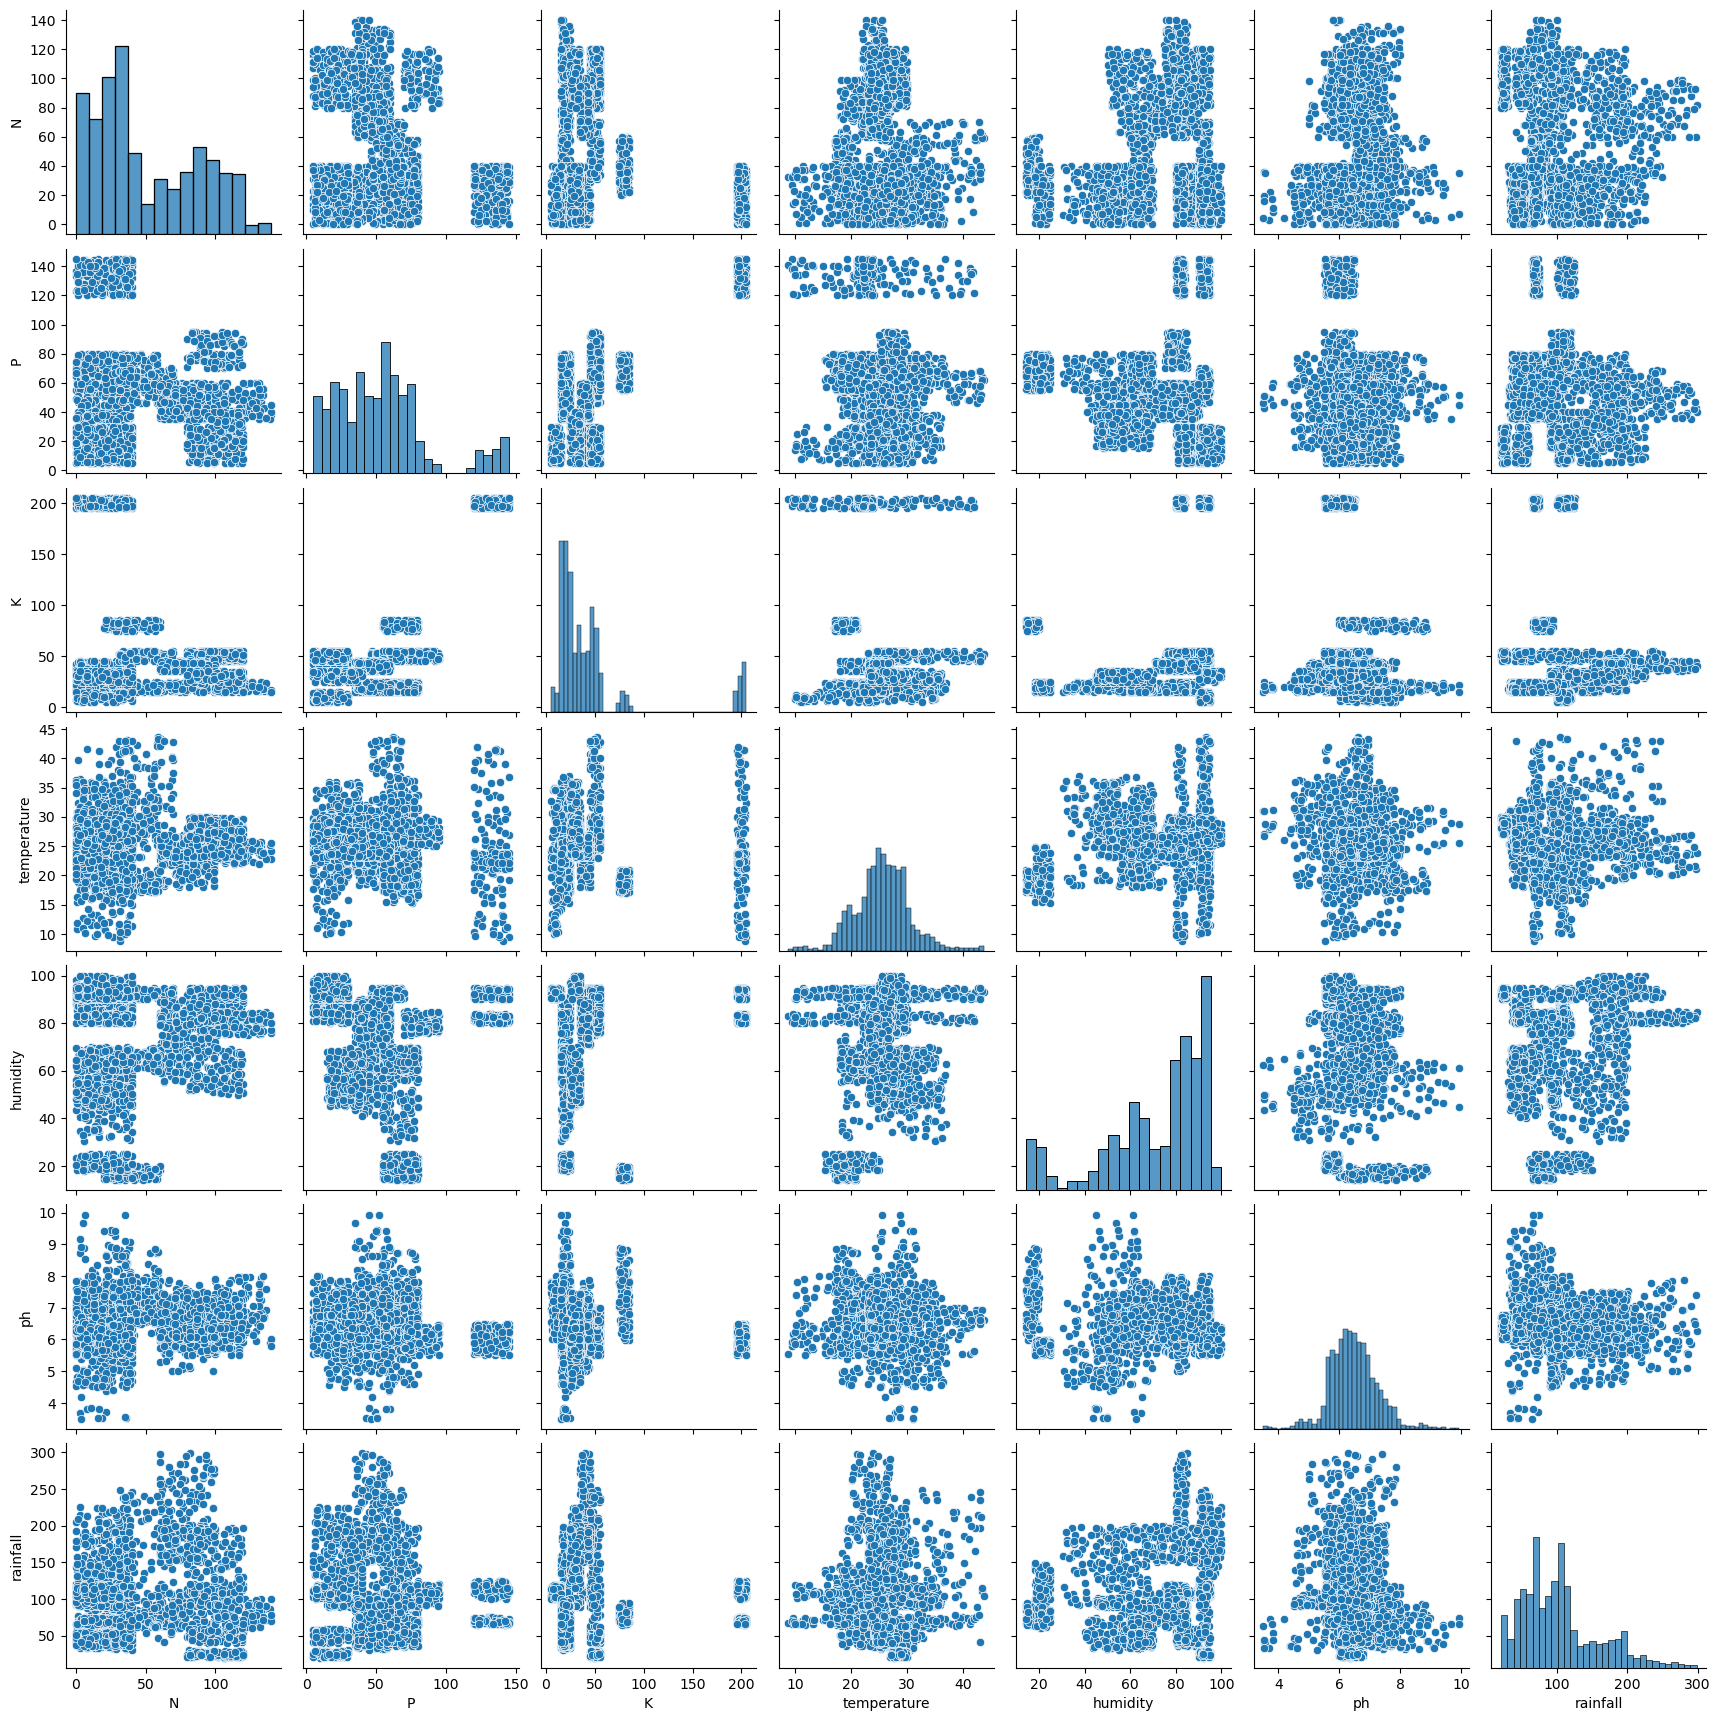

In [68]:
sns.pairplot(df.drop("label",axis=1))
    

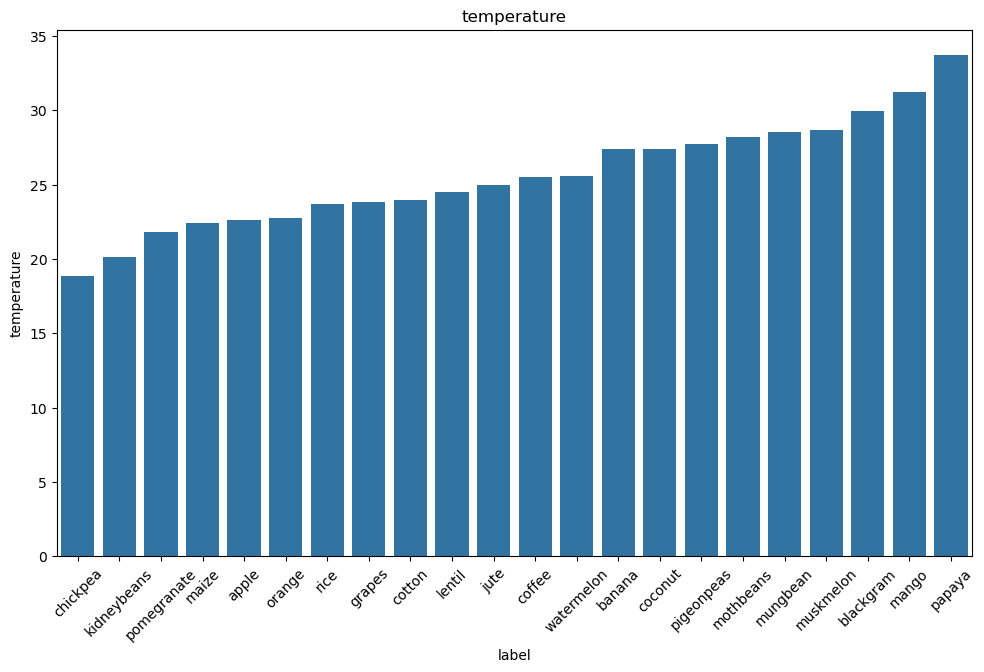

In [103]:
def bplot_ascending(variable):
    """
    Returns a barplot of mean values ascending for each crop
    variable: the variable to plot
    """

    plt.figure(figsize=(10, 6))
    sns.barplot(df.groupby("label").mean().sort_values(variable),x="label",y=variable)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.title(variable)
    plt.show() 

bplot_ascending("temperature")

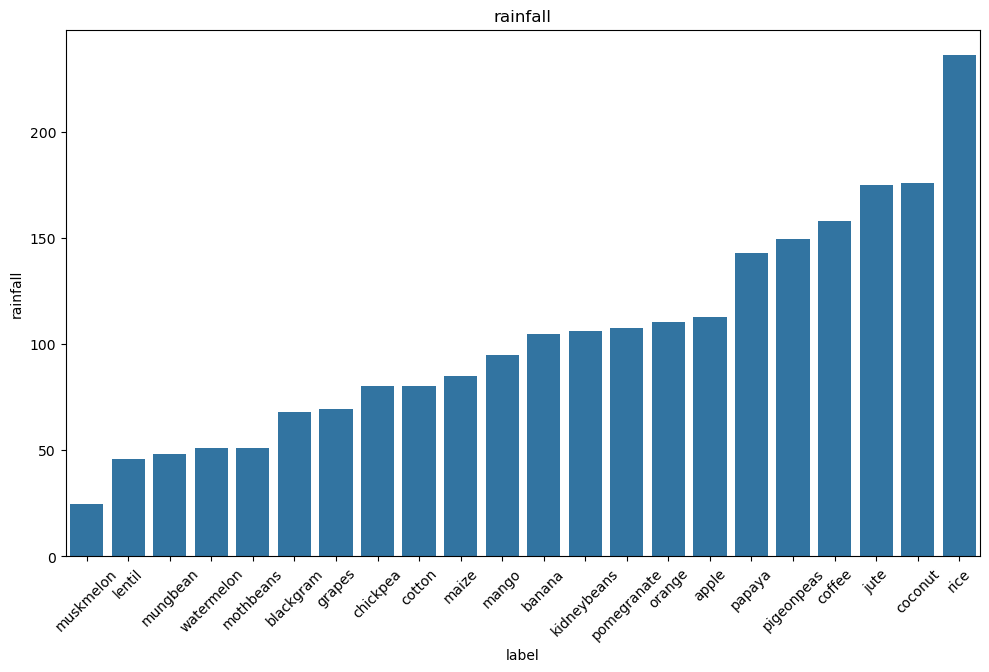

In [104]:
bplot_ascending("rainfall")

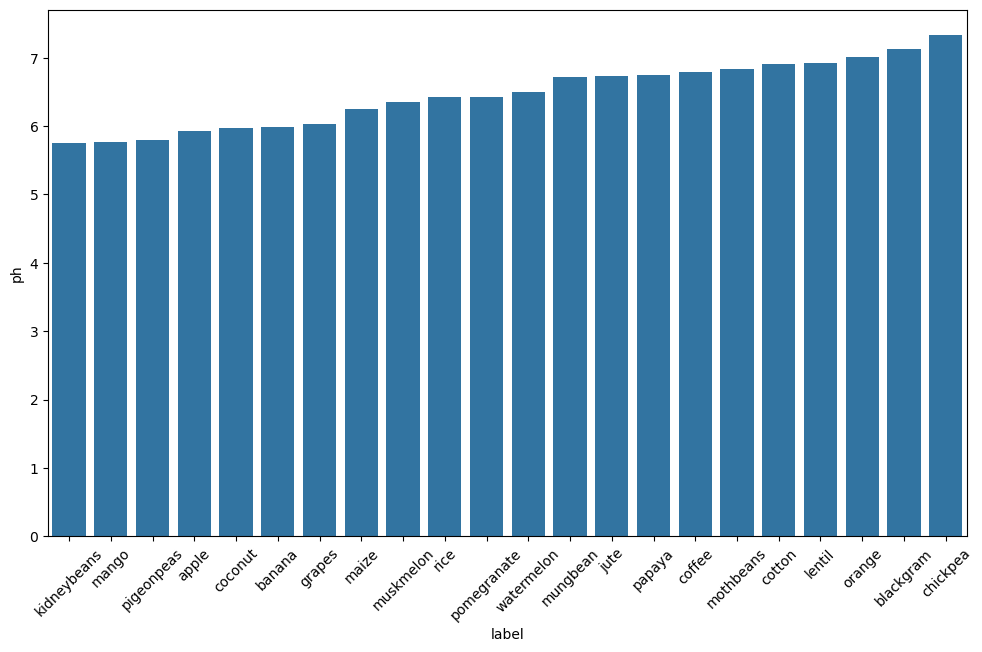

In [ ]:
bplot_ascending("ph")

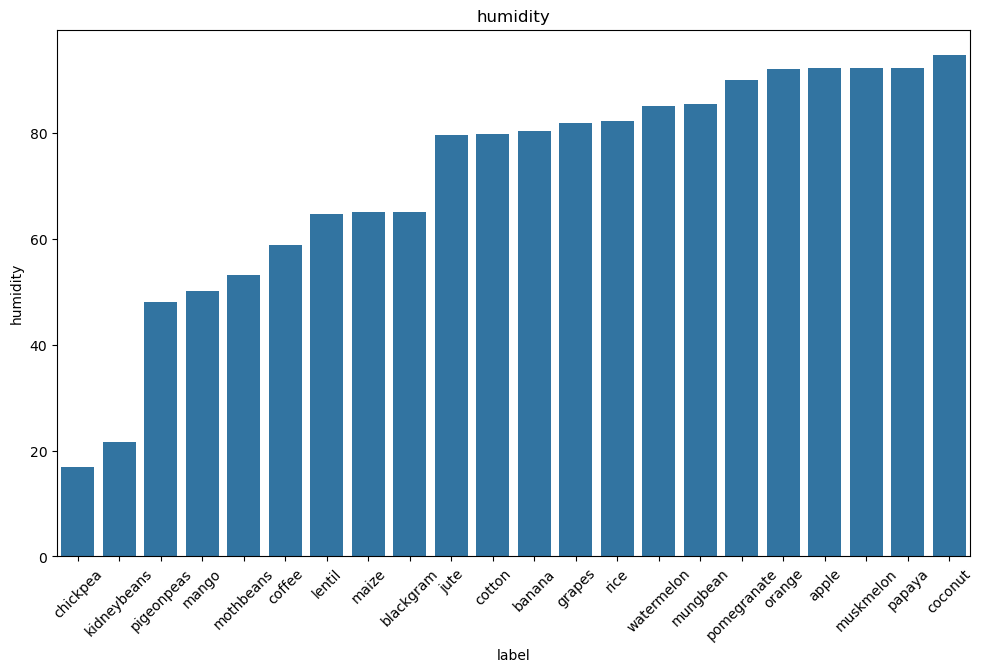

In [105]:
bplot_ascending("humidity")

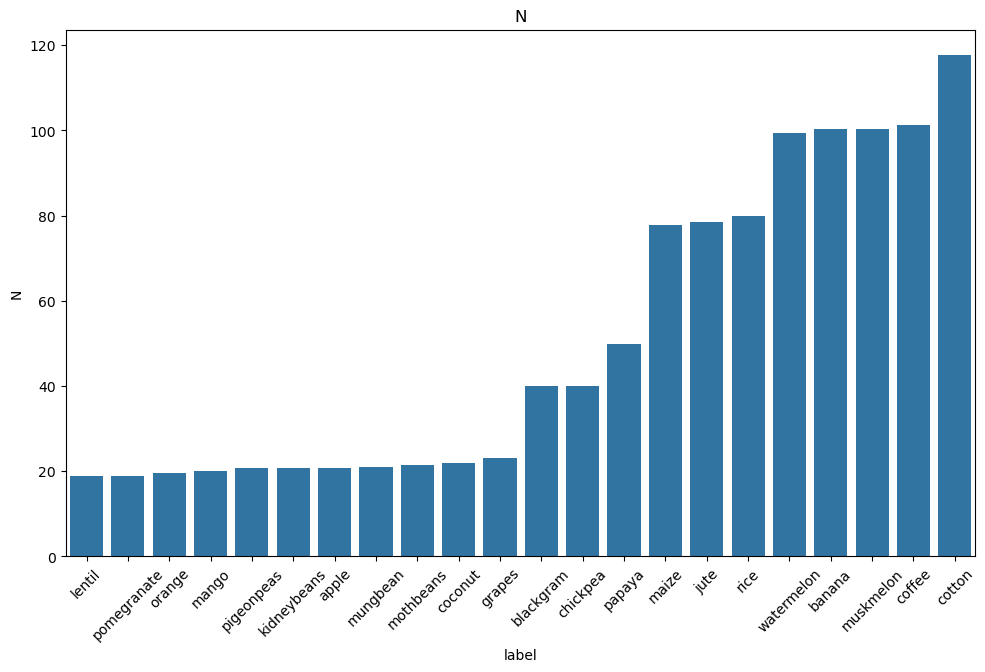

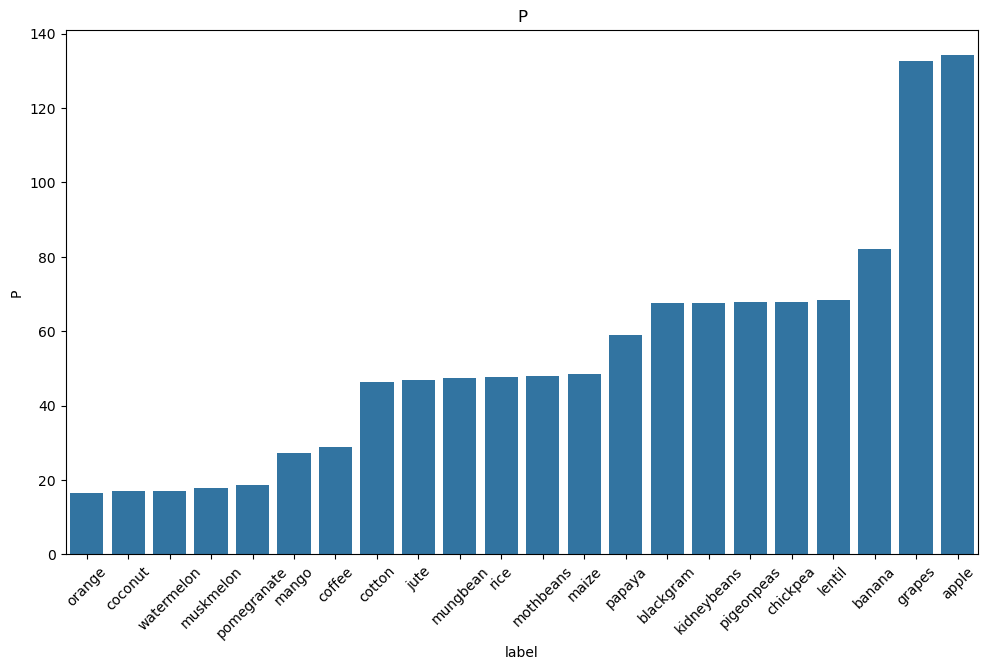

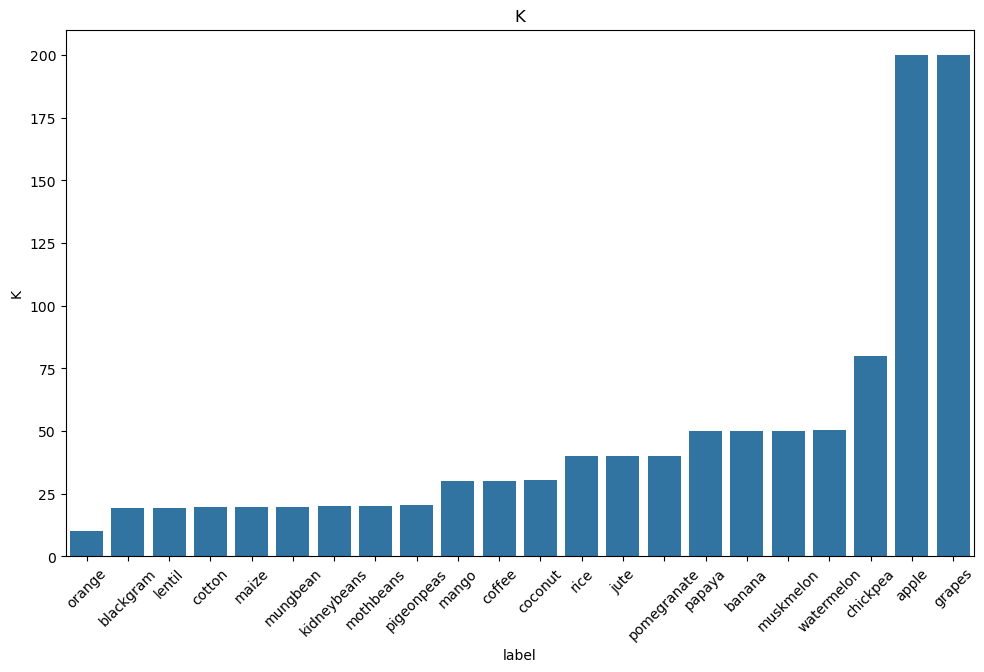

In [106]:
for i in df.columns[0:3]:
    bplot_ascending(i)

# KNN Classification

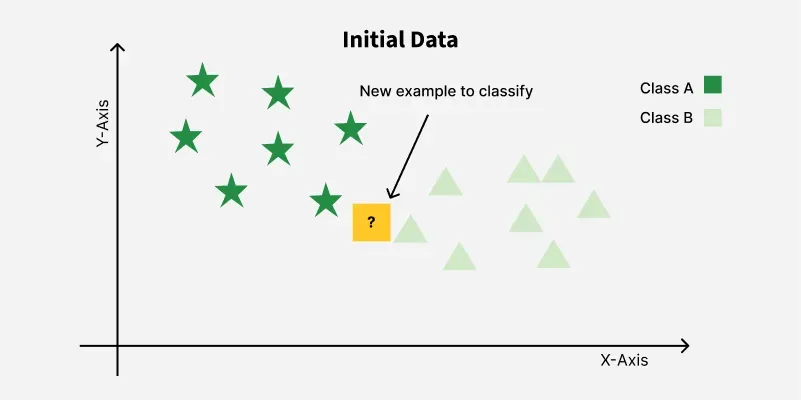
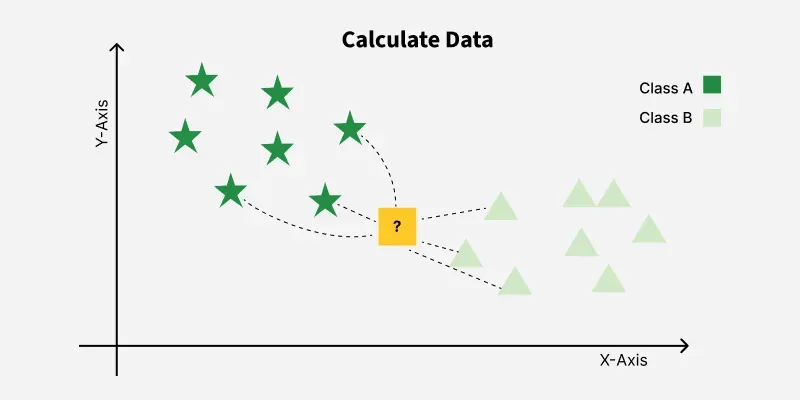
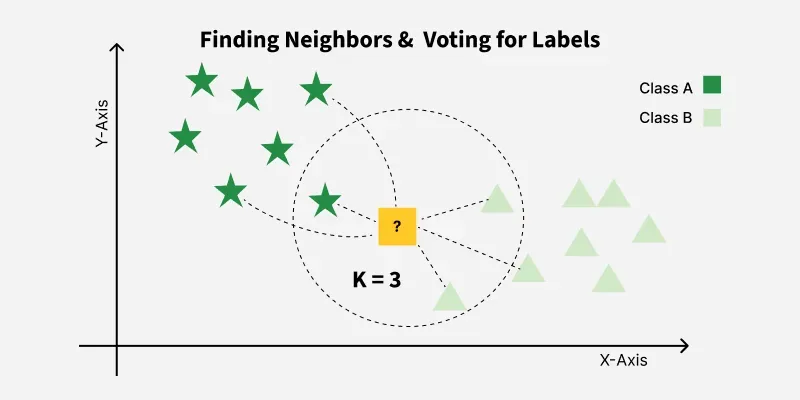

images from https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbours/

Hyperparameters

-k : the number of neighboring points to take into account for classification
--Small k: Captures local patterns but can be sensitive to noise and outliers. 
--Large k: Smoother decision boundaries but might miss local structure and lead to underfitting

-Distance Metric:
Determines how the distance between data points is calculated. eg Euclidean,Manhattan
The choice of distance metric can significantly impact the results, especially when features have different scales or distributions. 

-Weighting Scheme
Determines how much influence each neighbor has on the final prediction.
Uniform: All neighbors have equal weight.
Distance-based: Neighbors closer to the query point have more influence.
Inverse distance: Weight is inversely proportional to the distance.


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [108]:
df["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

 the dataset is balanced

In [111]:
le=LabelEncoder()
y=le.fit_transform(df["label"])

In [ ]:

#return a dataframe with encodel labels and their names
pd.DataFrame({
    "label_number":range(len(le.classes_)),
    "label_name":le.classes_
})

,label_number,label_name
0,0,apple
1,1,banana
2,2,blackgram
3,3,chickpea
4,4,coconut
5,5,coffee
6,6,cotton
7,7,grapes
8,8,jute
9,9,kidneybeans


In [136]:
X=df.drop("label",axis=1)
X=StandardScaler().fit_transform(X)

In [139]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [143]:
model=KNeighborsClassifier(n_neighbors=3)

In [145]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [147]:
y_pred=model.predict(X_test)

In [149]:
accuracy_score(y_test,y_pred)

0.9727272727272728

In [151]:
def score_by_k(n):
    model=KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    return accuracy_score(y_test,y_pred)

In [159]:
for i in range(1,10,1):
    print(i,"--",score_by_k(i))
    

1 -- 0.9763636363636363
2 -- 0.9654545454545455
3 -- 0.9727272727272728
4 -- 0.9727272727272728
5 -- 0.9745454545454545
6 -- 0.9709090909090909
7 -- 0.9781818181818182
8 -- 0.9727272727272728
9 -- 0.9690909090909091


The highest accuracy is reached for n=7

In [166]:
# gridsearch
from sklearn.model_selection import  GridSearchCV
param_grid={
    "n_neighbors":range(1,10,1),
    "weights":["uniform","distance"],
    "p":[1,2]}

grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,scoring="accuracy")

In [167]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [168]:
grid.best_params_

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

In [169]:
grid.score(X_test,y_test)

0.9854545454545455